In [1]:
import pandas as pd
import sqlite3
import psycopg2
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt1
import seaborn as sns
import numpy as np
from datetime import datetime


In [2]:
#creates a connection to the database
con = sqlite3.connect('C:\\Users\\con05838\\OneDrive - ONE Gas INC\\Desktop\\DataScienceClass\\Data Tables\\sqlite-sakila.db')

In [3]:
df = pd.read_sql_query("SELECT \
cus.customer_id, \
cus.first_name  || ' ' || cus.last_name  as Customer_Full_Name, \
country.country, \
f.rating, \
cat.name as Genre, \
f.rental_rate, \
f.rental_duration, \
inv.inventory_id, \
inv.film_id, \
s.staff_id, \
s.first_name || ' ' || s.last_name as Employee_full_Name, \
act.first_name || ' ' || act.last_name as Actor_Full_Name, \
f.title as movie_title, \
ren.rental_id, \
ren.rental_date, \
ren.return_date, \
st.store_id, \
pay.payment_id, \
pay.amount as payment_amount \
from customer cus \
LEFT JOIN address a ON a.address_id   = cus.address_id \
LEFT JOIN city c  on c.city_id  = a.city_id \
LEFT JOIN country on country.country_id = c.country_id \
LEFT JOIN payment pay on pay.customer_id = cus.customer_id \
LEFT JOIN rental ren on ren.customer_id  = cus.customer_id \
LEFT JOIN inventory inv on inv.inventory_id =ren.inventory_id \
LEFT JOIN film f on f.film_id  = inv.film_id  \
LEFT JOIN film_category fc on fc.film_id = f.film_id \
LEFT JOIN category cat on cat.category_id = fc.category_id \
LEFT JOIN staff s on s.staff_id  = pay.staff_id \
LEFT JOIN film_actor fa on fa.film_id  = f.film_id \
LEFT JOIN actor act on act.actor_id  = fa.actor_id \
LEFT JOIN store st on st.store_id = s.store_id \
group by cus.customer_id" ,con)

In [4]:
df

,customer_id,Customer_Full_Name,country,rating,Genre,rental_rate,rental_duration,inventory_id,film_id,staff_id,Employee_full_Name,Actor_Full_Name,movie_title,rental_id,rental_date,return_date,store_id,payment_id,payment_amount
0,1,MARY SMITH,Japan,NC-17,Classics,0.99,7,3021,663,1,Mike Hillyer,LUCILLE TRACY,PATIENT SISTER,76,2005-05-25 11:30:37.000,2005-06-03 12:00:37.000,1,1,2.99
1,2,PATRICIA JOHNSON,United States,NC-17,Animation,4.99,3,1090,243,1,Mike Hillyer,KARL BERRY,DOORS PRESIDENT,320,2005-05-27 00:09:24.000,2005-05-28 04:30:24.000,1,33,4.99
2,3,LINDA WILLIAMS,Greece,G,Action,0.99,5,3328,732,1,Mike Hillyer,JOHNNY LOLLOBRIGIDA,RINGS HEARTBREAKERS,435,2005-05-27 17:17:09.000,2005-06-02 11:20:09.000,1,60,1.99
3,4,BARBARA JONES,Myanmar,G,Animation,4.99,5,1075,239,1,Mike Hillyer,KIRK JOVOVICH,DOGMA FAMILY,1297,2005-06-15 09:31:28.000,2005-06-19 04:33:28.000,1,86,4.99
4,5,ELIZABETH BROWN,Taiwan,PG,Children,0.99,3,4124,896,1,Mike Hillyer,ZERO CAGE,TOOTSIE PILOT,731,2005-05-29 07:25:16.000,2005-05-30 05:21:16.000,1,108,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
594,595,TERRENCE GUNDERSON,China,R,Classics,4.99,3,270,60,1,Mike Hillyer,BETTE NICHOLSON,BEAST HUNCHBACK,613,2005-05-28 15:27:22.000,2005-06-02 20:01:22.000,1,15926,6.99
595,596,ENRIQUE FORSYTHE,Greece,R,Foreign,4.99,5,1111,246,2,Jon Stephens,HARRISON BALE,DOUBTFIRE LABYRINTH,303,2005-05-26 21:16:52.000,2005-05-27 23:41:52.000,2,15956,4.99
596,597,FREDDIE DUGGAN,Peru,PG-13,Children,2.99,6,2613,573,2,Jon Stephens,HELEN VOIGHT,MICROCOSMOS PARADISE,34,2005-05-25 04:19:28.000,2005-05-29 00:10:28.000,2,15984,2.99
597,598,WADE DELVALLE,Switzerland,PG-13,Drama,0.99,6,286,64,1,Mike Hillyer,SANDRA PECK,BEETHOVEN EXORCIST,3005,2005-06-20 10:10:29.000,2005-06-28 15:48:29.000,1,16009,2.99


In [5]:
#pulls the Data frame
#export
df.to_csv('Anchor.csv', index = True)

In [6]:
# gives an overview of the dataframe, most interested in Dtypes and Null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         599 non-null    int64  
 1   Customer_Full_Name  599 non-null    object 
 2   country             599 non-null    object 
 3   rating              599 non-null    object 
 4   Genre               599 non-null    object 
 5   rental_rate         599 non-null    float64
 6   rental_duration     599 non-null    int64  
 7   inventory_id        599 non-null    int64  
 8   film_id             599 non-null    int64  
 9   staff_id            599 non-null    int64  
 10  Employee_full_Name  599 non-null    object 
 11  Actor_Full_Name     598 non-null    object 
 12  movie_title         599 non-null    object 
 13  rental_id           599 non-null    int64  
 14  rental_date         599 non-null    object 
 15  return_date         599 non-null    object 
 16  store_id

In [7]:
#lamda function that calculates Revenue by taking Rental_rate and
def Revenue(x, y):
    return x * y

df['Revenue']=df.apply(lambda x: Revenue(x['rental_rate'], x['rental_duration']), axis=1)

In [8]:
#see's how many times a country pops up in the dataframe to see which countries are out highest.
Popular_country=df['country'].value_counts().reset_index()

In [9]:
Popular_country

,index,country
0,India,60
1,China,53
2,United States,36
3,Japan,31
4,Mexico,30
...,...,...
103,Finland,1
104,Faroe Islands,1
105,North Korea,1
106,Nepal,1


In [10]:
#calculates Revenue based off rating and Genre

RevenuebyRateandGen=df.groupby(['rating','Genre'])['Revenue'].sum().reset_index()

In [11]:
RevenuebyRateandGen.to_csv('RevenuebyRateandGen.csv', index = True)

In [12]:
#calculates the mean of the Revenue Columns
df.loc[:, 'Revenue'].mean()

15.105742904841373

In [13]:
# determines the rating of  each transaction based off the average revenue per sale.

df['Sales_Rating'] = np.where((df['Revenue']>0.1)& (df['Revenue'] <= 14.99),'below average',
                   np.where((df['Revenue'] >= 15)&(df['Revenue'] <= 15.99), 'Average',
                   np.where(df['Revenue']>= 16, 'Above Average', 'No Sale')))

In [29]:
df.to_csv('Anchor.csv', index = True)

In [15]:
#finds the most popular  Genre
#3 ready for export
PopularGenre=df['Genre'].value_counts().head(1).reset_index()


In [16]:
PopularGenre.to_csv('PopularGenre.csv', index = True)

In [17]:
SalePerEmployee = df.groupby(['Employee_full_Name','staff_id'])['payment_id'].count().reset_index()

In [18]:
#Total amount of sales per employee,  #4 export to tableau

SalePerEmployee.to_csv('SalePerEmployee.csv', index = True)

In [19]:
 #calculates the inventory of both stores by movie title
    #5
InventorybyMovieTitle=df.groupby(['store_id','movie_title'])['inventory_id'].count().sample(n=20).reset_index()

In [20]:
InventorybyMovieTitle = InventorybyMovieTitle.rename(columns={'inventory_id': 'Number_of_movies_in_Stock'})

In [21]:
InventorybyMovieTitle.to_csv('InventorybyMovieTitle.csv', index = True)

In [22]:
#top grossing store and their highest grossing Genre

Top_grossing_Store = df.groupby(['store_id'])['Revenue'].sum().reset_index()

In [23]:
Top_grossing_Store.to_csv('Top_grossing_Store.csv', index = True)

In [24]:
Top_Customer = df.groupby(['customer_id','Customer_Full_Name'])['payment_amount'].sum().reset_index()

In [25]:
Top_Customer.to_csv('Top_Customer.csv', index = True)

# Charts

<AxesSubplot:xlabel='store_id'>

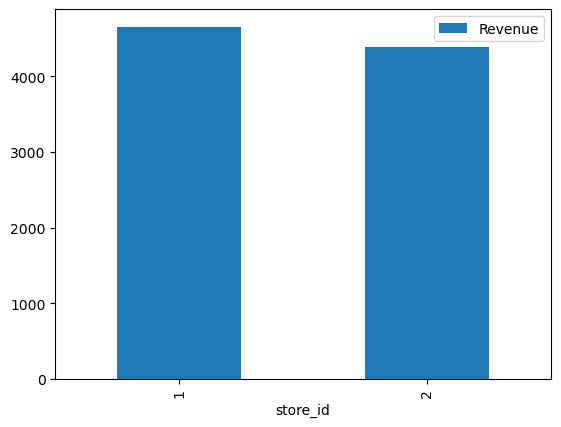

In [26]:
# plotting  bar graph
Top_grossing_Store.plot(x="store_id", y=['Revenue'], kind="bar")

In [27]:
InventorybyMovieTitle

,store_id,movie_title,Number_of_movies_in_Stock
0,1,CONTACT ANONYMOUS,1
1,1,ENCOUNTERS CURTAIN,1
2,2,LOSER HUSTLER,1
3,1,MASK PEACH,2
4,2,SEABISCUIT PUNK,1
5,1,CANDIDATE PERDITION,1
6,1,ALASKA PHANTOM,1
7,1,ARACHNOPHOBIA ROLLERCOASTER,1
8,2,WORST BANGER,1
9,1,INSIDER ARIZONA,1


<AxesSubplot:xlabel='movie_title'>

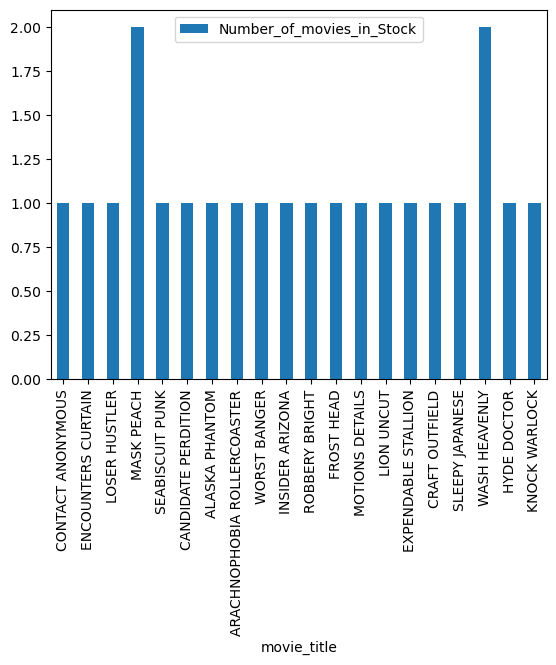

In [28]:
InventorybyMovieTitle.plot(x="movie_title", y=['Number_of_movies_in_Stock'], kind="bar")